In [3]:
# 📦 Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📁 Load datasets from /data folder
data_path = 'data'

influencers = pd.read_csv(f"{data_path}/influencers.csv")
posts = pd.read_csv(f"{data_path}/posts.csv")
tracking = pd.read_csv(f"{data_path}/tracking_data.csv")
payouts = pd.read_csv(f"{data_path}/payouts.csv")

# ✅ Optional: Clean column names
for df in [influencers, posts, tracking, payouts]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [4]:
# 📊 Step 2: Aggregate tracking data by influencer_id
tracking_summary = tracking.groupby('influencer_id').agg({
    'orders': 'sum',
    'revenue': 'sum'
}).reset_index()

# 👁️ View result
tracking_summary.head()


,influencer_id,orders,revenue
0,1,31,7905.59
1,2,47,11935.27
2,3,79,19561.03
3,4,66,13494.80
4,5,41,9185.01


In [5]:
# 💸 Step 3: Merge with payouts and calculate ROAS
df = pd.merge(tracking_summary, payouts, on='influencer_id', how='left')

# Calculate ROAS
df['roas'] = df['revenue'] / df['total_payout']

# 👁️ View result
df[['influencer_id', 'revenue', 'total_payout', 'roas']].head()


,influencer_id,revenue,total_payout,roas
0,1,7905.59,141700,0.055791
1,2,11935.27,8250,1.446699
2,3,19561.03,1000,19.561030
3,4,13494.80,1000,13.494800
4,5,9185.01,1000,9.185010


In [6]:
# 🧠 Step 4: Add name, category, platform info
df = pd.merge(df, influencers[['influencer_id', 'name', 'category', 'platform']], on='influencer_id', how='left')

# 👁️ Final combined data
df.head()


,influencer_id,orders_x,revenue,basis,rate,orders_y,total_payout,roas,name,category,platform
0,1,31,7905.59,order,50,2834,141700,0.055791,Influencer_1,Fitness,TikTok
1,2,47,11935.27,order,50,165,8250,1.446699,Influencer_2,Food,YouTube
2,3,79,19561.03,post,1000,2539,1000,19.561030,Influencer_3,Travel,TikTok
3,4,66,13494.80,post,1000,100,1000,13.494800,Influencer_4,Food,YouTube
4,5,41,9185.01,post,1000,550,1000,9.185010,Influencer_5,Food,Instagram


In [7]:
# 🏆 Step 5: Top 5 Influencers by ROAS
top5 = df.sort_values(by='roas', ascending=False).head(5)
top5[['name', 'platform', 'category', 'revenue', 'total_payout', 'roas']]


,name,platform,category,revenue,total_payout,roas
2,Influencer_3,TikTok,Travel,19561.03,1000,19.56103
8,Influencer_9,Instagram,Travel,18199.33,1000,18.19933
9,Influencer_10,YouTube,Food,15051.09,1000,15.05109
11,Influencer_12,Twitter,Fitness,14851.59,1000,14.85159
5,Influencer_6,Twitter,Beauty,14514.15,1000,14.51415


In [8]:
# 👎 Step 6: Bottom 5 Influencers
bottom5 = df.sort_values(by='roas').head(5)
bottom5[['name', 'platform', 'category', 'revenue', 'total_payout', 'roas']]


,name,platform,category,revenue,total_payout,roas
0,Influencer_1,TikTok,Fitness,7905.59,141700,0.055791
17,Influencer_18,Instagram,Fitness,12108.35,204000,0.059355
16,Influencer_17,YouTube,Gaming,12187.33,176500,0.069050
13,Influencer_14,TikTok,Fashion,14526.97,146750,0.098991
15,Influencer_16,Instagram,Tech,13208.42,114850,0.115006


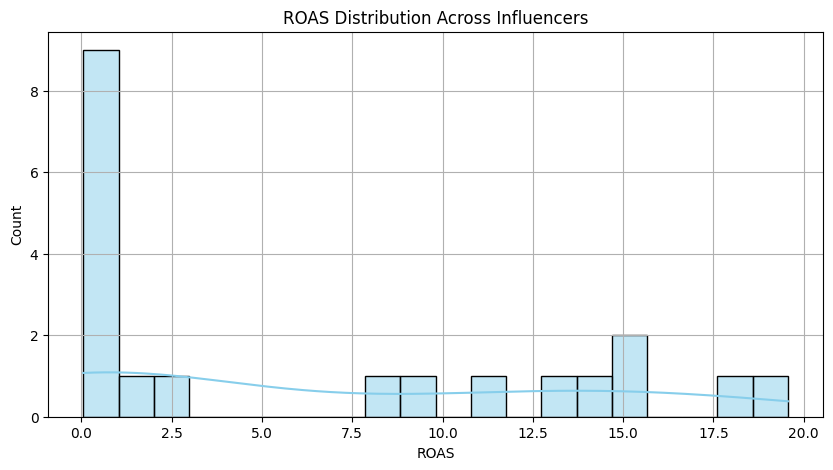

In [9]:
# 📈 Step 7: ROAS Distribution Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['roas'], bins=20, kde=True, color='skyblue')
plt.title("ROAS Distribution Across Influencers")
plt.xlabel("ROAS")
plt.ylabel("Count")
plt.grid(True)
plt.show()


C:\Users\satya\AppData\Local\Temp\ipykernel_22840\2139366634.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="platform", y="roas", estimator='mean', ci=None, palette='Set2')
C:\Users\satya\AppData\Local\Temp\ipykernel_22840\2139366634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="platform", y="roas", estimator='mean', ci=None, palette='Set2')


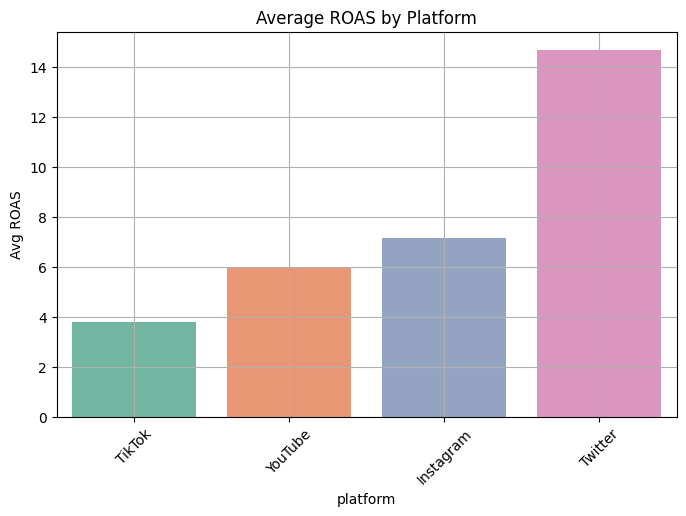

In [10]:
# 📊 Step 8: ROAS by Platform
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="platform", y="roas", estimator='mean', ci=None, palette='Set2')
plt.title("Average ROAS by Platform")
plt.xticks(rotation=45)
plt.ylabel("Avg ROAS")
plt.grid(True)
plt.show()


In [11]:
# 💾 Step 9: Export Top 5 influencers to CSV
export_path = 'outputs/exports/top5_influencers.csv'
top5.to_csv(export_path, index=False)
print(f"Top 5 Influencers exported to {export_path}")


Top 5 Influencers exported to outputs/exports/top5_influencers.csv
